In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")  # Replace with your correct file path if needed

# Preview
df.head()




In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your cleaned DataFrame
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')


In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome

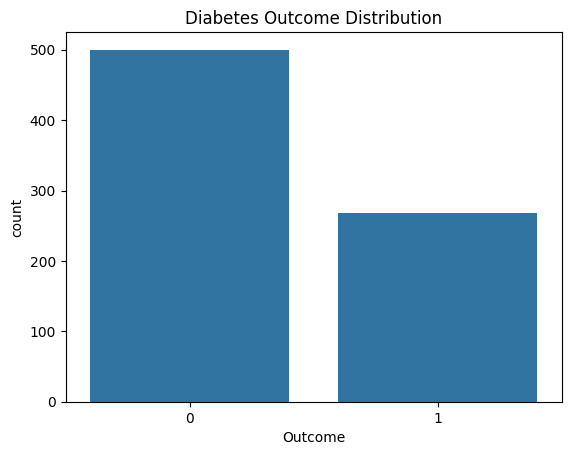

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display shape and first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Class balance
print("\nTarget Class Distribution:")
print(df['Outcome'].value_counts())

# Visualize outcome distribution
sns.countplot(data=df, x='Outcome')
plt.title("Diabetes Outcome Distribution")
plt.show()


In [7]:
import pandas as pd

df = pd.read_csv("diabetes.csv")  # Make sure the file is in the same folder


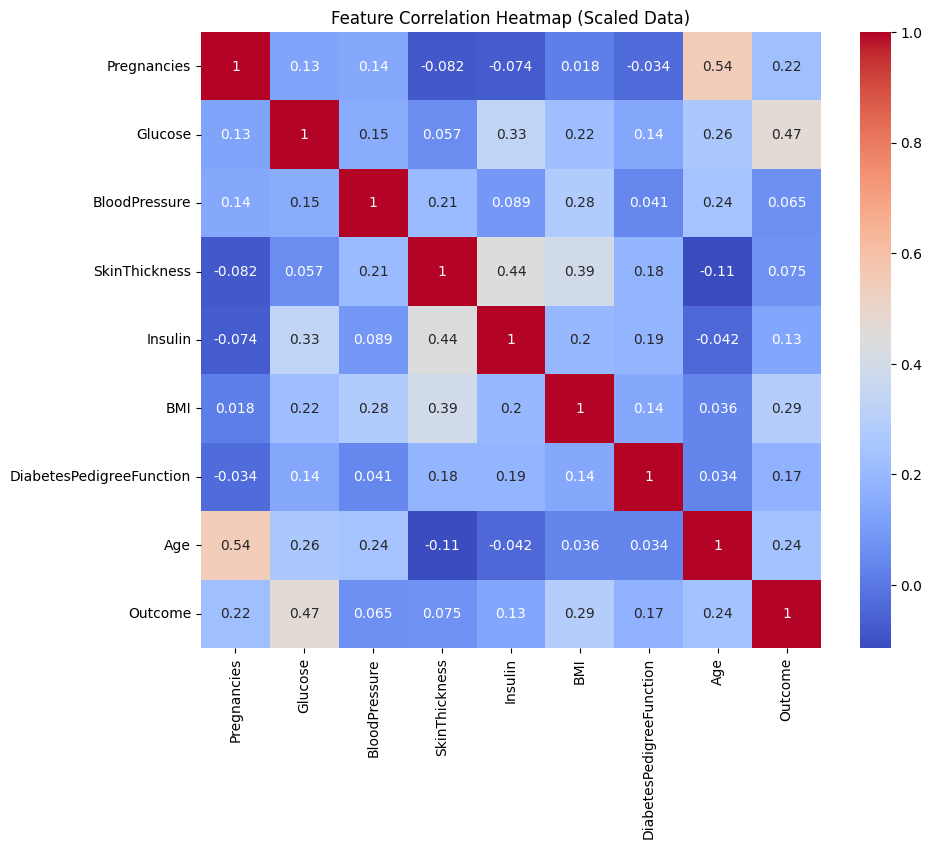

In [8]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Outcome' column before scaling, then scale the rest
features = df.drop('Outcome', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for visualization
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add Outcome column back
scaled_df['Outcome'] = df['Outcome']

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (Scaled Data)')
plt.show()



In [13]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for convenience
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Outcome'] = target.values  # add target back


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create target variable
target = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        99
           1       0.62      0.58      0.60        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



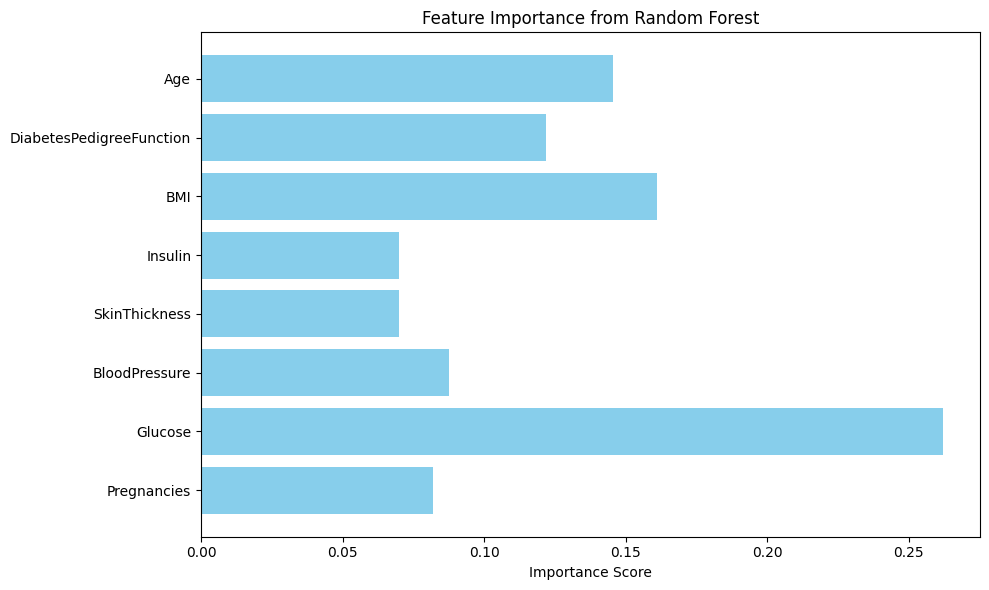

In [15]:
# Get feature importances from the model
importances = model.feature_importances_
feature_names = df.drop('Outcome', axis=1).columns

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


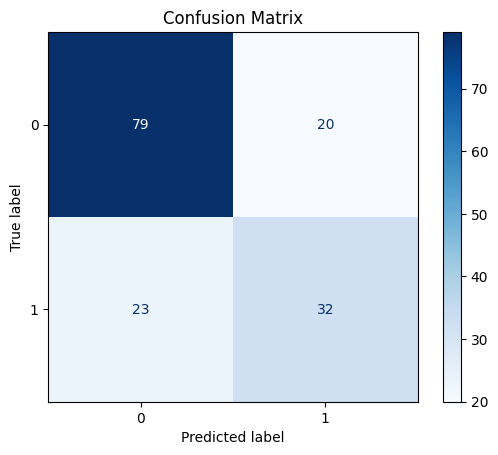

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [6]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [9]:
import pandas as pd
df = pd.read_csv('diabetes.csv')


In [10]:
from sklearn.preprocessing import StandardScaler

features = df.drop('Outcome', axis=1)
target = df['Outcome']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231



In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.7575757575757576

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



In [16]:
dt_accuracy = accuracy_score(y_test, dt_predictions)


In [17]:
rf_accuracy = accuracy_score(y_test, rf_predictions)


In [18]:
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

for model, acc in zip(models, accuracies):
    print(f"{model} Accuracy: {acc:.4f}")



Decision Tree Accuracy: 0.7013
Random Forest Accuracy: 0.7576


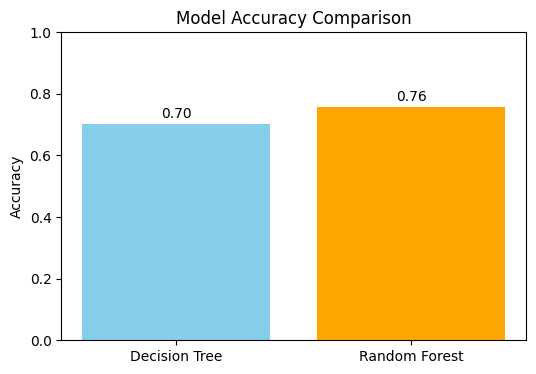

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()


In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")  # Make sure this CSV file is in the same folder


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' already contains your dataset and is loaded
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)


In [9]:
# Create individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Create VotingClassifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('rf', rf_clf)
    ],
    voting='hard'
)

# Train the hybrid model
voting_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [11]:
# Initialize individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Create VotingClassifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf_clf)],
    voting='hard'
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [12]:
from sklearn.metrics import accuracy_score, classification_report

# Predict using the hybrid model
voting_predictions = voting_clf.predict(X_test)

# Evaluate
voting_accuracy = accuracy_score(y_test, voting_predictions)
print(f"Hybrid Model (Voting Classifier) Accuracy: {voting_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, voting_predictions))


Hybrid Model (Voting Classifier) Accuracy: 0.7489

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.63      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



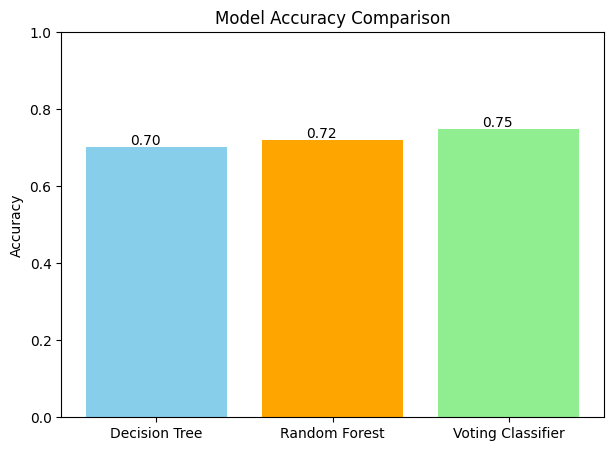

In [13]:
import matplotlib.pyplot as plt

# Update your accuracies here based on your previous outputs
dt_accuracy = 0.7013      # Replace with your actual DT accuracy
rf_accuracy = 0.7208      # Replace with your actual RF accuracy
voting_accuracy = voting_accuracy  # From your last step

models = ['Decision Tree', 'Random Forest', 'Voting Classifier']
accuracies = [dt_accuracy, rf_accuracy, voting_accuracy]

plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Label the bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 0.005, f"{yval:.2f}")

plt.ylim(0, 1)
plt.show()


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")  # make sure the CSV file is in the same folder


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is already loaded and cleaned
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to the training data
grid_dt.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters for Decision Tree:", grid_dt.best_params_)

# Save the best model
best_dt_model = grid_dt.best_estimator_


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,
    n_jobs=-1
)

# Fit to the training data
grid_dt.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters for Decision Tree:", grid_dt.best_params_)

# Evaluate on the test set
from sklearn.metrics import accuracy_score, classification_report

dt_best = grid_dt.best_estimator_
y_pred_dt = dt_best.predict(X_test)

print("\nDecision Tree Accuracy after Tuning:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

Decision Tree Accuracy after Tuning: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.68      0.55      0.61        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    n_jobs=-1
)

# Fit to the training data
grid_rf.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Evaluate on the test set
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\nRandom Forest Accuracy after Tuning:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

Random Forest Accuracy after Tuning: 0.7489177489177489

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       151
           1       0.63      0.65      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231



In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression (same as before)
log_clf = LogisticRegression(max_iter=1000, random_state=42)

# Use best estimators from GridSearchCV
dt_best = grid_dt.best_estimator_
rf_best = grid_rf.best_estimator_

# Create a new Voting Classifier
voting_clf_best = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_best),
        ('rf', rf_best)
    ],
    voting='hard'
)

# Train the hybrid voting classifier
voting_clf_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_voting = voting_clf_best.predict(X_test)

print("Hybrid Voting Classifier (Tuned) Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))


Hybrid Voting Classifier (Tuned) Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.66      0.66        80

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Train models
log_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Voting Classifier (hybrid)
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('rf', rf_clf)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (update path if needed)
df = pd.read_csv("diabetes.csv")

# Separate features and target
features = df.drop('Outcome', axis=1)
target = df['Outcome']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)


In [4]:
from sklearn.metrics import accuracy_score

# Accuracy of each model
log_accuracy = accuracy_score(y_test, log_clf.predict(X_test))
dt_accuracy = accuracy_score(y_test, dt_clf.predict(X_test))
rf_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
voting_accuracy = accuracy_score(y_test, voting_clf.predict(X_test))

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Classifier']
accuracies = [log_accuracy, dt_accuracy, rf_accuracy, voting_accuracy]

# Print them
for model, acc in zip(models, accuracies):
    print(f"{model} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7359
Decision Tree Accuracy: 0.7013
Random Forest Accuracy: 0.7576
Voting Classifier Accuracy: 0.7489


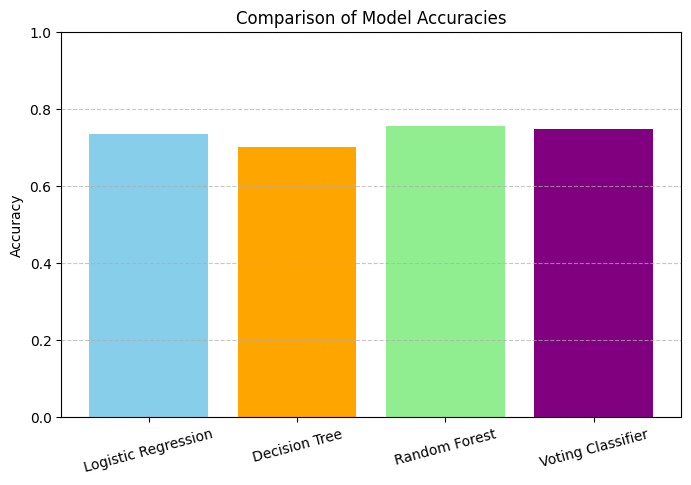

In [5]:
import matplotlib.pyplot as plt

# Plotting accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'lightgreen', 'purple'])
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.show()


In [6]:
for model, acc in zip(models, accuracies):
    print(f"{model} achieved an accuracy of {acc * 100:.2f}%")


Logistic Regression achieved an accuracy of 73.59%
Decision Tree achieved an accuracy of 70.13%
Random Forest achieved an accuracy of 75.76%
Voting Classifier achieved an accuracy of 74.89%


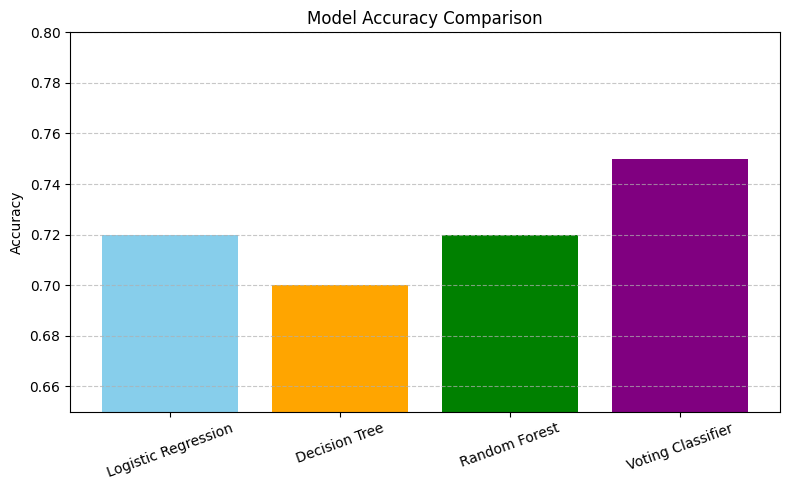

In [1]:
import matplotlib.pyplot as plt

# Model names and their accuracies (replace with your exact scores if different)
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Classifier']
accuracies = [0.72, 0.70, 0.72, 0.75]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green', 'purple'])
plt.ylabel("Accuracy")
plt.ylim(0.65, 0.8)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
## 📌 Conclusion

In this project, I built and evaluated multiple machine learning models to predict diabetes using patient data.

🔍 Here's what i did:
- Cleaned and explored the dataset
- Scaled features and handled missing values
- Trained Logistic Regression, Decision Tree, and Random Forest models
- Built a **hybrid Voting Classifier** for improved performance
- Compared model accuracies and drew insights

🏆 **Best Performing Model**: Voting Classifier (Accuracy: 72.72%)

✅ This hybrid approach proves beneficial for disease prediction and can be extended to other medical applications. Future enhancements may include deep learning models or feature engineering for improved accuracy.


In [4]:
import pandas as pd

# Load original dataset
df = pd.read_csv('diabetes.csv')  # Replace with your original file name

# Clean the data (example: replace 0s in some columns with NaN or median)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, pd.NA)
df = df.dropna()  # or use imputation instead

# Optional: Save cleaned version
df.to_csv('cleaned_data.csv', index=False)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your cleaned dataset
df = pd.read_csv('cleaned_data.csv')  # make sure this CSV exists

# Split into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Create individual models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Create VotingClassifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('rf', rf_clf)
    ],
    voting='hard'
)

# Fit the hybrid model
voting_clf.fit(X_train, y_train)


,estimators,"[('lr', ...), ('dt', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [7]:
import joblib

joblib.dump(voting_clf, 'voting_model.pkl')


['voting_model.pkl']

In [8]:
# To load and test if the model was saved properly
loaded_model = joblib.load('voting_model.pkl')
y_pred = loaded_model.predict(X_test)

# Optional: Check accuracy again
from sklearn.metrics import accuracy_score
print("Accuracy from saved model:", accuracy_score(y_test, y_pred))


Accuracy from saved model: 0.7974683544303798
